In [1]:
import pandas as pd


In [2]:
import random

# pmf = probability mass function

In [3]:
# rolling 2  dice 10000 times
L=[]
for i in range(10000):
    a=random.randint(1,6)
    b=random.randint(1,6)
    
    L.append(a+b)

In [4]:
L[:5]

[9, 8, 8, 9, 11]

In [5]:
#probability of each outcome
s=(pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [6]:
s

2     0.0286
3     0.0574
4     0.0826
5     0.1124
6     0.1376
7     0.1667
8     0.1349
9     0.1124
10    0.0806
11    0.0567
12    0.0301
dtype: float64

<Axes: >

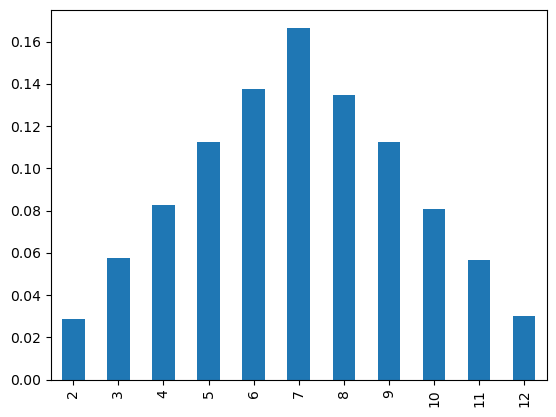

In [7]:
s.plot(kind='bar')

In [8]:
#pmf of our event

In [9]:
import numpy as np

In [10]:
np.cumsum(s)

2     0.0286
3     0.0860
4     0.1686
5     0.2810
6     0.4186
7     0.5853
8     0.7202
9     0.8326
10    0.9132
11    0.9699
12    1.0000
dtype: float64

<Axes: >

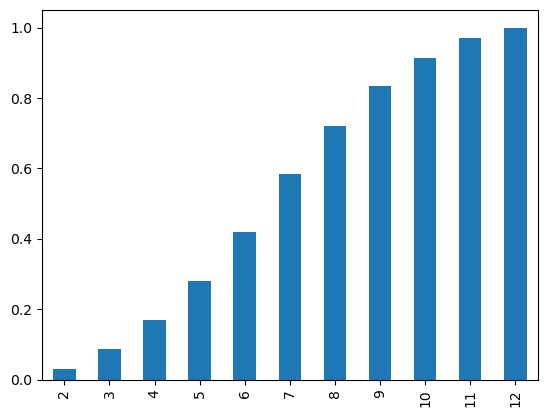

In [11]:
np.cumsum(s).plot(kind='bar')

In [12]:
# the above graph indicates cumallative distribution for pmf

# probability density function

# parametric function


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

In [14]:
sample= normal(loc=50, scale=5,size=1000) #normal distribution, population parameters 

In [15]:
sample

array([48.07047119, 49.90466515, 50.07487306, 63.08203966, 49.35213937,
       52.13373983, 53.64434881, 52.17294833, 50.15654505, 47.57334298,
       50.97420471, 45.59642742, 49.57033488, 54.37787887, 56.77866369,
       52.60530684, 51.04181075, 45.45706095, 52.31889444, 51.92653522,
       50.16234137, 49.25351741, 44.16450102, 47.95359475, 44.93815965,
       54.12119155, 51.41352857, 52.91562482, 36.6149198 , 44.16883524,
       50.37323421, 48.42180889, 47.83151968, 47.21428451, 49.51761918,
       53.66299083, 46.59512307, 50.27558002, 51.30530966, 44.39187586,
       56.19457282, 55.45374317, 50.42312201, 51.75235442, 43.74252233,
       46.88609444, 51.83906021, 48.98802155, 57.14217807, 52.10319903,
       55.49680849, 57.12918213, 60.53469264, 49.31173087, 49.94614275,
       53.68200226, 47.15509697, 62.88903817, 51.25787958, 50.19985647,
       57.29008527, 51.16433704, 48.265258  , 49.63611237, 51.5669469 ,
       40.40449649, 40.95426682, 53.49248587, 40.06549522, 49.37

(array([ 12.,  54., 113., 207., 286., 192., 106.,  20.,   8.,   2.]),
 array([35.69106951, 38.96059539, 42.23012126, 45.49964714, 48.76917301,
        52.03869888, 55.30822476, 58.57775063, 61.8472765 , 65.11680238,
        68.38632825]),
 <BarContainer object of 10 artists>)

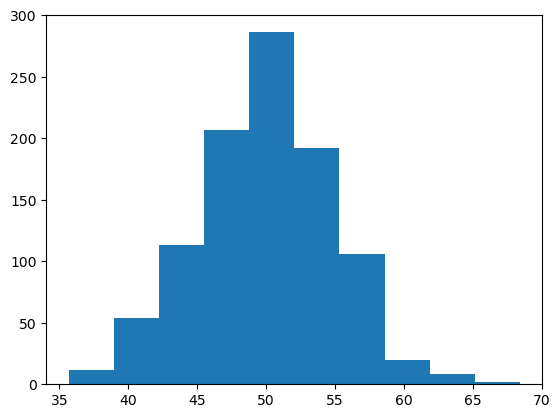

In [17]:
plt.hist(sample,bins=10)

In [18]:
#calculate sample mean and sample std dev

sample_mean=sample.mean()
sample_std=sample.std()

In [19]:
sample_mean

49.95873251873118

In [20]:
sample_std

4.833461312457385

In [21]:
# fit the distribution with the above parameter 

from scipy.stats import norm

dist= norm(sample_mean,sample_std)

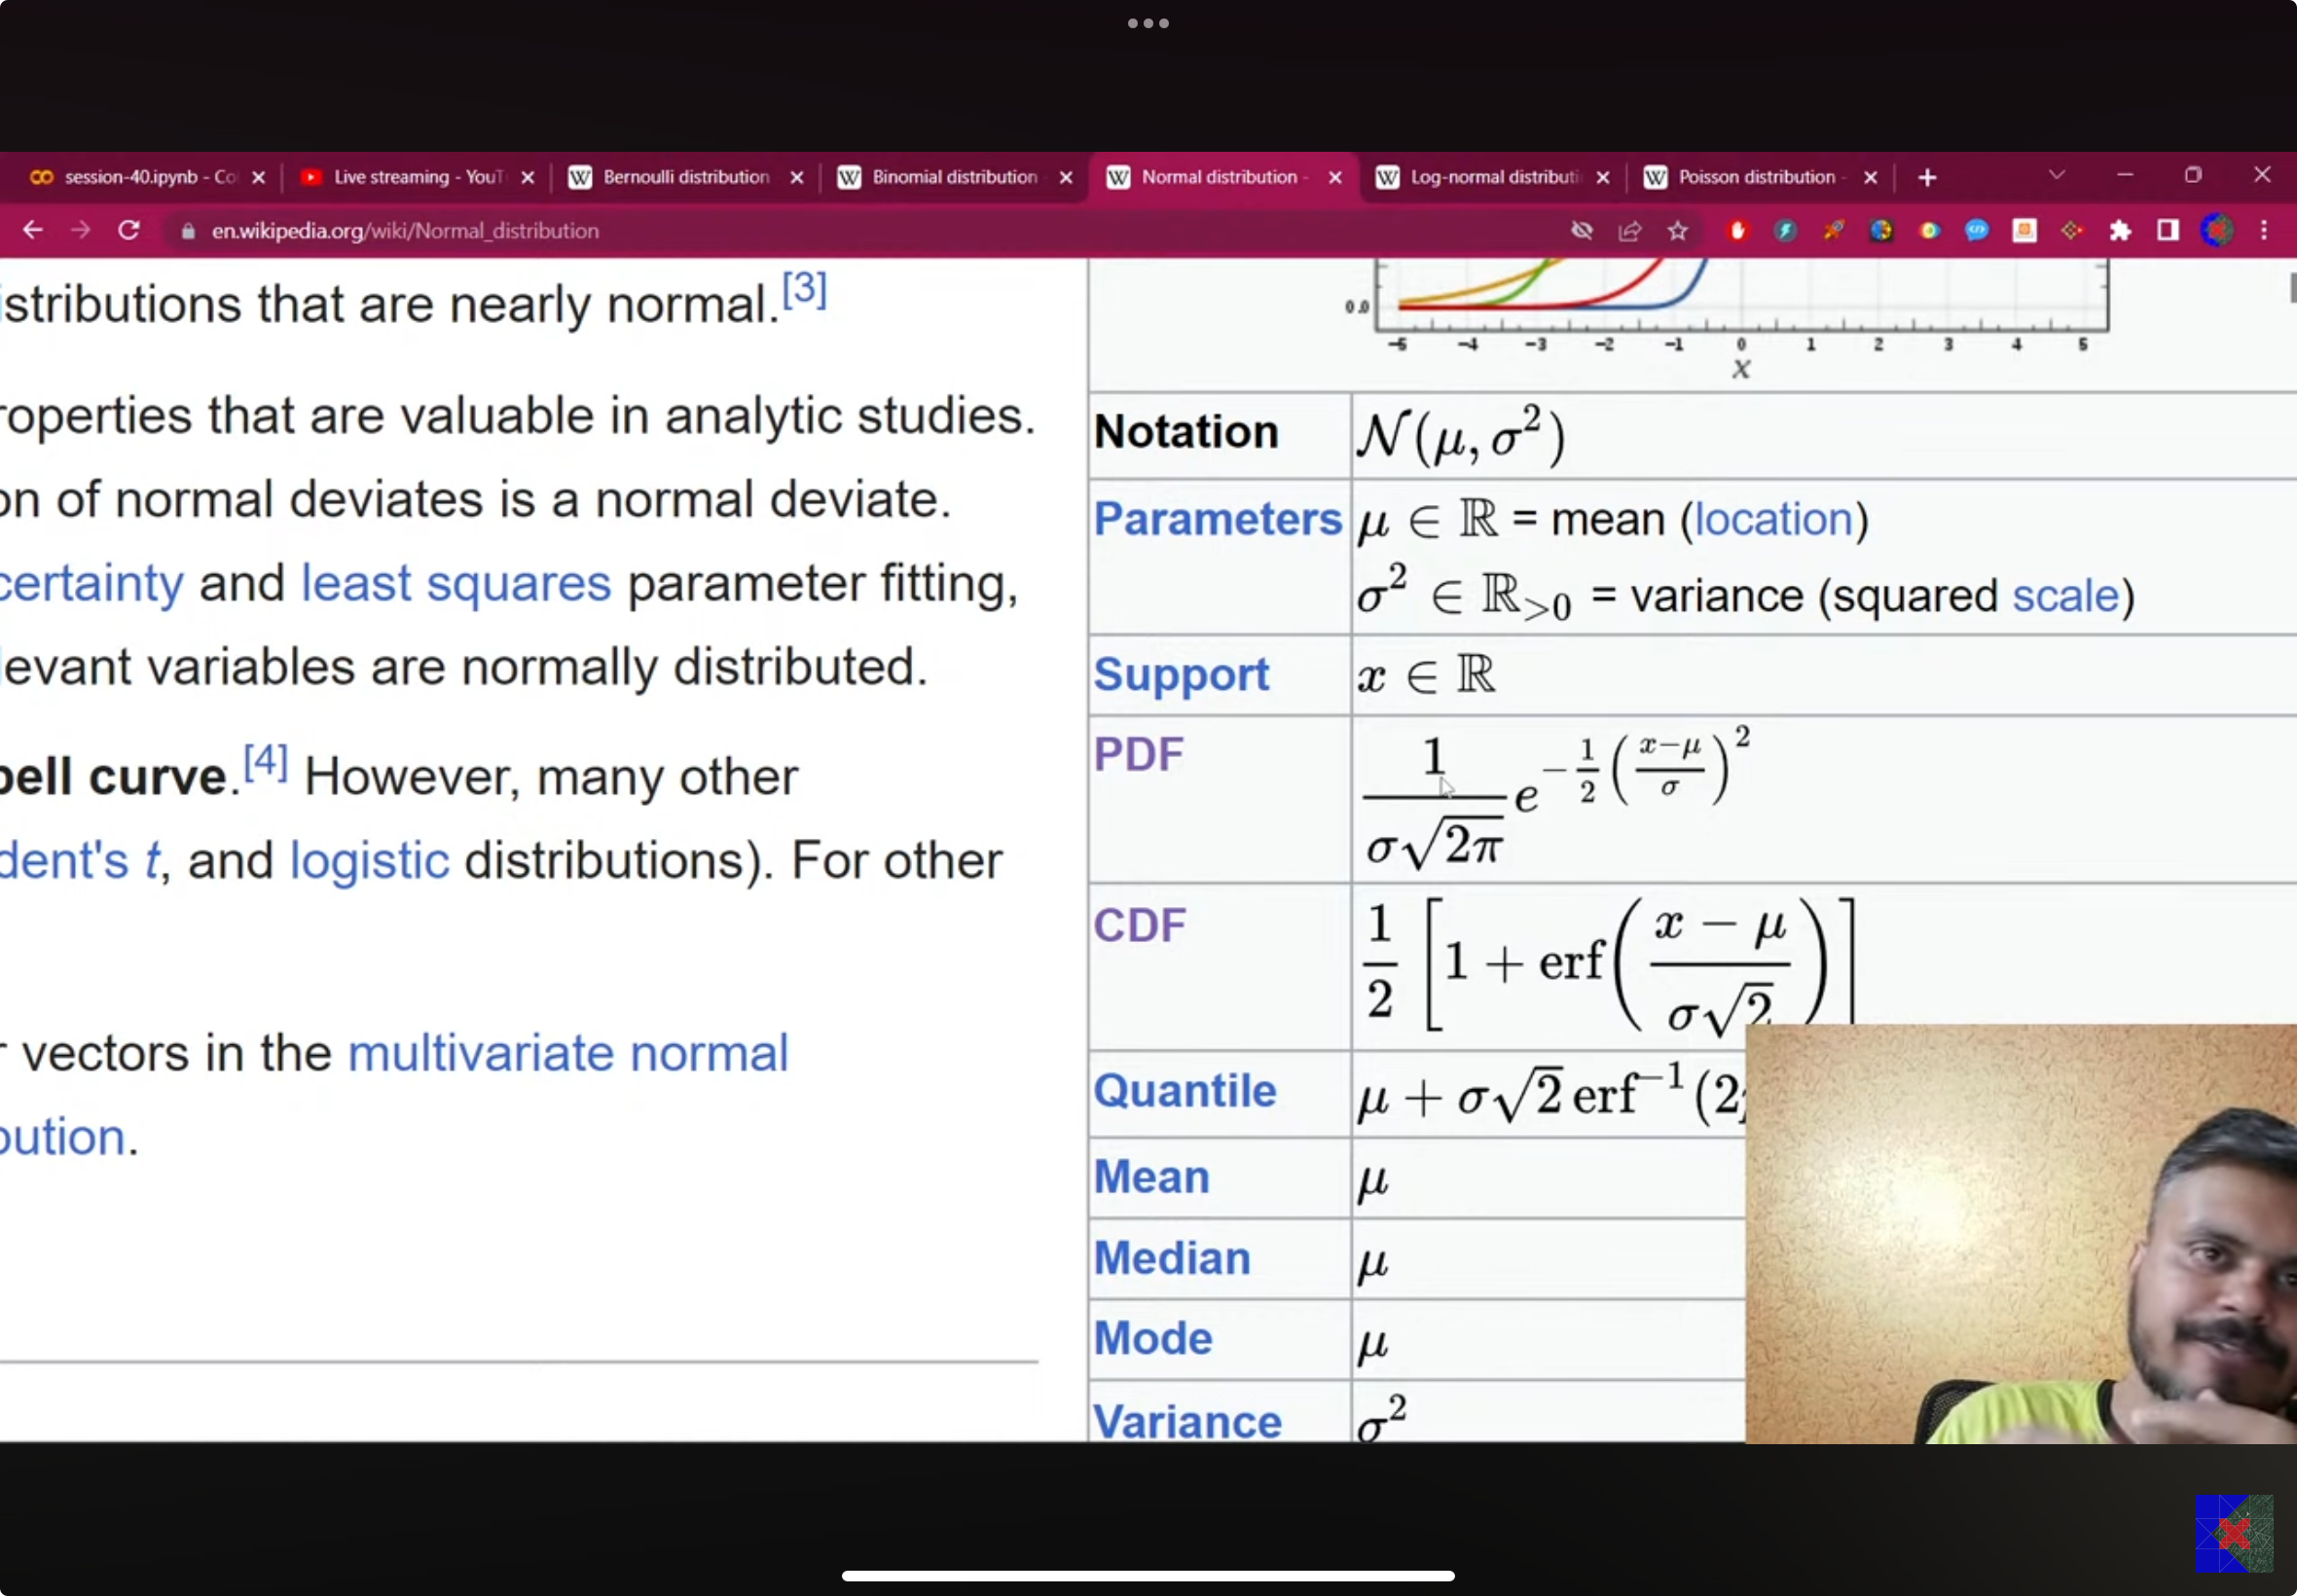

In [22]:
values=np.linspace(sample.min(),sample.max(),100)

In [24]:
probabilities_desity= [dist.pdf(value) for value in values] # calculating pdf 

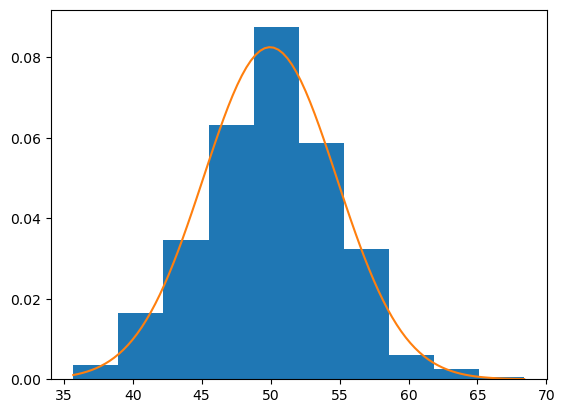

In [28]:
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

# non parametric function

# KDE

In [38]:
sample1=normal(loc=20,scale=5,size=300)
sample2=normal(loc=40,scale=5,size=700)

sample=np.hstack((sample1,sample2))

(array([ 20.,  64., 108.,  82.,  60., 133., 255., 203.,  65.,  10.]),
 array([ 7.68054881, 12.47805327, 17.27555772, 22.07306218, 26.87056663,
        31.66807109, 36.46557554, 41.26308   , 46.06058445, 50.85808891,
        55.65559336]),
 <BarContainer object of 10 artists>)

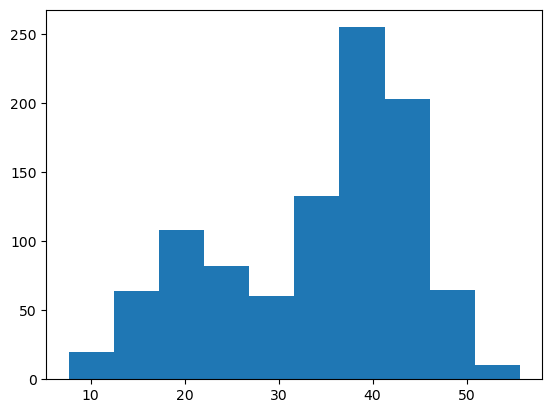

In [40]:
plt.hist(sample,bins=10)

In [41]:
from sklearn.neighbors import KernelDensity

model= KernelDensity(bandwidth=3, kernel='gaussian')

#converting a data from 1 d to 2d 
sample=sample.reshape((len(sample),1))

In [42]:
model.fit(sample)

KernelDensity(bandwidth=3)

In [44]:
values=np.linspace(sample.min(),sample.max(),100)

values=values.reshape((len(values),1))

In [45]:
probabilities=model.score_samples(values)
probabilities=np.exp(probabilities)

score_samples(values) returns the log density estimate of the input sample values, this is because the score samples method of kernal density class returns the logarithm of the probabilty density estimate rather than the actual probability density estimate.

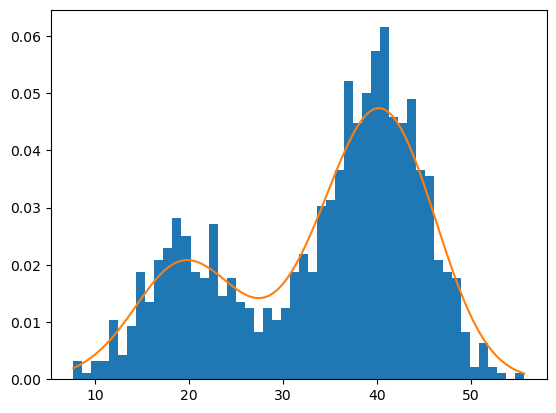

In [46]:
plt.hist(sample,bins=50,density=True)
plt.plot(values[:],probabilities)

<Axes: ylabel='Density'>

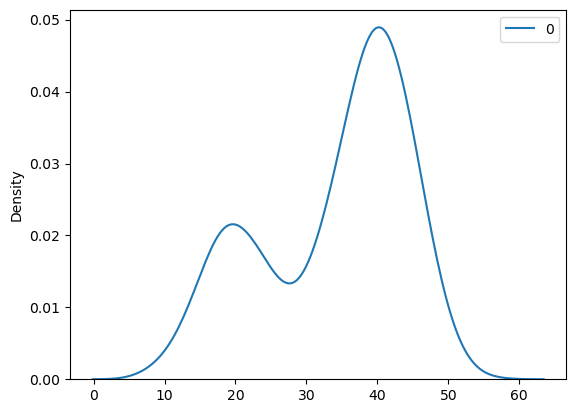

In [47]:
sns.kdeplot(sample)